OGHENETEGA ADOGBEJI


## CAPITAL-ONE
#### (DATA CHALLENGE)

## Candidate Instructions

The Data Challenge will give you an opportunity to showcase your skills and abilities in areas
that align with how we challenge our Data Analysts at Capital One. We have created the Data
Challenge to help us find great people to join our team as we continue to develop data products.
As you work on your submission, keep in mind that we will be evaluating every applicant on the
following key areas:
1. Builder Mindset: Utilize the right open source tools (Python or R) to create adaptive and
innovative solutions that successfully run. Write code with effective formatting and
structure that contains sufficient comments and is concise. Also, write code that
leverages functions or other approaches that makes it reusable, as well as effectively
join datasets.
2. Data Management: Systematically perform data quality checks, document issues, and
take deliberate steps to resolve issues. In addition, write metadata (a data dictionary)
documentation for any fields that you create.
3. Business Intelligence: Create a variety of visualizations that tell a story and provide
recommendations that address the business problem. Also, document assumptions and
provide ideas for future next steps.

## Problem Statement
You are consulting for an airline company looking to enter the United States domestic market
which has identified medium and large airports as their desired operating locations. The
company believes that it has a competitive advantage in maintaining punctuality, so it plans on
making this a big part of its brand image with a motto, “On time, for you.” To kick start
operations, the company has decided to start with 5 round trip routes. An example of a round
trip route is the combination of JFK to ORD and ORD to JFK. The opposite order of the
route, ORD to JFK and JFK to ORD, would be considered the same round trip.
You have been tasked with analyzing 1Q2019 data to identify:
1. The 10 busiest round trip routes in terms of number of round trip flights in the quarter.
Exclude canceled flights when performing the calculation.
2. The 10 most profitable round trip routes (without considering the upfront airplane cost) in
the quarter. Along with the profit, show total revenue, total cost, summary values of other
key components and total round trip flights in the quarter for the top 10 most profitable
routes. Exclude canceled flights from these calculations.
3. The 5 round trip routes that you recommend to invest in based on any factors that you
choose.
4. The number of round trip flights it will take to breakeven on the upfront airplane cost for
each of the 5 round trip routes that you recommend. Print key summary components for
these routes.
5. Key Performance Indicators (KPI’s) that you recommend tracking in the future to
measure the success of the round trip routes that you recommend.


In [254]:
import pandas as pd 
import numpy as np 
from scipy import stats
from scipy.stats import chi2
from scipy.stats import *
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [20, 5]

import warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.2f}'.format

## Step 1 
#### Pre Processing
 i) Imported our datasets

In [255]:
flights=pd.read_csv(r'C:\Users\tegaa\Downloads\data (1)\Flights.csv')
tickets=pd.read_csv(r'C:\Users\tegaa\Downloads\data (1)\Tickets.csv')
airportCodes=pd.read_csv(r'C:\Users\tegaa\Downloads\data (1)\Airport_Codes.csv')


In [256]:
flights=flights[flights['CANCELLED']==0]
tickets=tickets[tickets['ROUNDTRIP']==1]
airportCodes=airportCodes[((airportCodes['TYPE']=='medium_airport') | (airportCodes['TYPE']=='large_airport')) & (airportCodes['ISO_COUNTRY']=='US') ]



 #### Pre Processing 
 ii) Data Cleaning and removing duplicates

In [257]:
print (len(airportCodes))
print (len(airportCodes.drop_duplicates()))
print (len(flights))
print (len(flights)-len(flights.drop_duplicates()))
print (len(tickets))
print (len(tickets)-len(tickets.drop_duplicates()))
airportCodes=airportCodes.drop_duplicates()
flights=flights.drop_duplicates()
tickets=tickets.drop_duplicates()



858
858
1023558
0
633506
17076


#### Remove negative values from DEP_DELAY and ARR_DELAY as they are later used in calculation


#### Similarly multiplying occupancy_rate by 200 as all the flights are of 200 capicity. This would also be used in later on calculations

In [258]:



flights['DEP_DELAY'].loc[flights['DEP_DELAY']<0]=0
flights['ARR_DELAY'].loc[flights['ARR_DELAY']<0]=0
flights['DEP_DELAY']=np.where((flights['DEP_DELAY']-15<0),0 , flights['DEP_DELAY']-15)
flights['ARR_DELAY']=np.where((flights['ARR_DELAY']-15<0),0 , flights['ARR_DELAY']-15)


flights['OCCUPANCY_RATE']=flights["OCCUPANCY_RATE"]*200

#### Taking care of  Outliers
###### FLIGHTS DATA

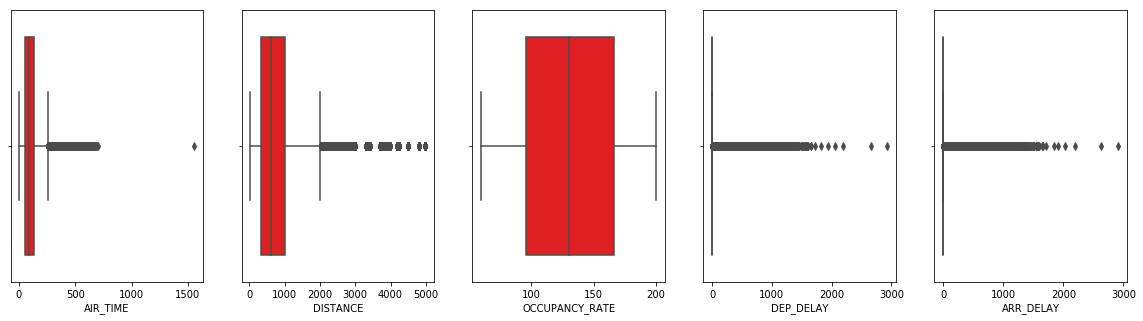

In [259]:
fig, ax =plt.subplots(1,5)
sns.boxplot(x='AIR_TIME',data=flights,ax=ax[0],color='red')
sns.boxplot(x='DISTANCE',data=flights,ax=ax[1],color='red')
sns.boxplot(x='OCCUPANCY_RATE',data=flights,ax=ax[2], color='red')
sns.boxplot(x='DEP_DELAY',data=flights,ax=ax[3], color='red')
sns.boxplot(x='ARR_DELAY',data=flights,ax=ax[4], color='red')


fig.show()

###### TICKETS DATA

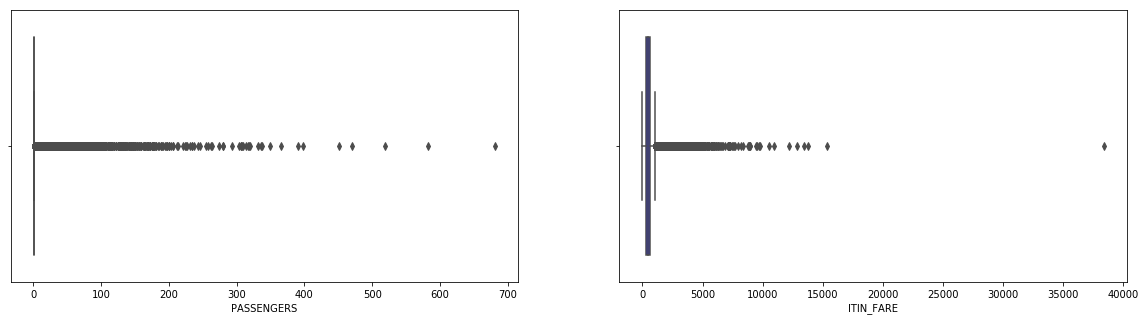

In [260]:
fig, ax =plt.subplots(1,2)
sns.boxplot(x='PASSENGERS',data=tickets,ax=ax[0], color='blue')
sns.boxplot(x='ITIN_FARE',data=tickets,ax=ax[1], color='blue')
fig.show()

###### Checking for ANOMALIES

In [261]:
tickets[tickets['PASSENGERS']>280]

ITIN_ID  YEAR  QUARTER ORIGIN ORIGIN_COUNTRY ORIGIN_STATE_ABR  \
83429  201912000000.00  2019        1    ATL             US               GA   
150251 201911000000.00  2019        1    BOS             US               MA   
333958 201912000000.00  2019        1    DTW             US               MI   
336742 201912000000.00  2019        1    DTW             US               MI   
356723 201914000000.00  2019        1    EWR             US               NJ   
420890 201913000000.00  2019        1    HNL             US               HI   
421466 201915000000.00  2019        1    HOU             US               TX   
423080 201915000000.00  2019        1    HOU             US               TX   
486851 201911000000.00  2019        1    JFK             US               NY   
489171 201912000000.00  2019        1    JFK             US               NY   
496461 201911000000.00  2019        1    JFK             US               NY   
609071 201915000000.00  2019        1    MDW             US               IL   
611214 201915000000.00  2019        1    MDW             US               IL   
611447 201915000000.00  2019        1    MDW             US               IL   
656897 201912000000.00  2019        1    MSP             US               MN   
658349 201912000000.00  2019        1    MSP             US               MN   
786267 201915000000.00  2019        1    PHX             US               AZ   
870238 201915000000.00  2019        1    SAN             US               CA   
896342 201911000000.00  2019        1    SEA             US               WA   
950046 201915000000.00  2019        1    SJC             US               CA   
962155 201912000000.00  2019        1    SLC             US               UT   
970210 201915000000.00  2019        1    SMF             US               CA   

       ORIGIN_STATE_NM  ROUNDTRIP REPORTING_CARRIER  PASSENGERS  ITIN_FARE  \
83429          Georgia          1                DL      365.00      11.00   
150251   Massachusetts          1                B6      306.00      11.00   
333958        Michigan          1                DL      681.00      11.00   
336742        Michigan          1                DL      471.00      11.00   
356723      New Jersey          1                UA      519.00       0.00   
420890          Hawaii          1                HA      349.00     148.00   
421466           Texas          1                WN      319.00      11.00   
423080           Texas          1                WN      307.00     523.00   
486851        New York          1                B6      304.00      11.00   
489171        New York          1                DL      294.00      11.00   
496461        New York          1                B6      331.00      11.00   
609071        Illinois          1                WN      398.00      11.00   
611214        Illinois          1                WN      582.00      11.00   
611447        Illinois          1                WN      320.00      11.00   
656897       Minnesota          1                DL      336.00      11.00   
658349       Minnesota          1                DL      338.00      11.00   
786267         Arizona          1                WN      451.00      11.00   
870238      California          1                WN      317.00      11.00   
896342      Washington          1                AS      308.00      11.00   
950046      California          1                WN      390.00      11.00   
962155            Utah          1                DL      309.00      11.00   
970210      California          1                WN      314.00      11.00   

       DESTINATION  
83429          MIA  
150251         TPA  
333958         MCO  
336742         TPA  
356723         PBI  
420890         LIH  
421466         LAS  
423080         DAL  
486851         MCO  
489171         LAX  
496461         PBI  
609071         PHX  
611214         MCO  
611447         LAS  
656897         DEN  
658349         TPA  
786267         LAS  
8

In [262]:
tickets[tickets['ITIN_FARE']>10000]

ITIN_ID  YEAR  QUARTER ORIGIN ORIGIN_COUNTRY ORIGIN_STATE_ABR  \
36135  201913000000.00  2019        1    PIH             US               ID   
110692 201915000000.00  2019        1    BDL             US               CT   
355172 201914000000.00  2019        1    EWR             US               NJ   
527911 201914000000.00  2019        1    LAX             US               CA   
586574 201914000000.00  2019        1    MCI             US               MO   
927914 201914000000.00  2019        1    SFO             US               CA   
929787 201914000000.00  2019        1    SFO             US               CA   
968736 201913000000.00  2019        1    SLC             US               UT   

       ORIGIN_STATE_NM  ROUNDTRIP REPORTING_CARRIER  PASSENGERS  ITIN_FARE  \
36135            Idaho          1                OO        1.00   13790.00   
110692     Connecticut          1                YV        1.00   12225.00   
355172      New Jersey          1                UA        1.00   12882.00   
527911      California          1                UA        1.00   10944.00   
586574        Missouri          1                UA        1.00   10564.00   
927914      California          1                UA        1.00   13474.00   
929787      California          1                UA        1.00   15365.00   
968736            Utah          1                OO        1.00   38400.00   

       DESTINATION  
36135          SLC  
110692         IAH  
355172         ORD  
527911         ORD  
586574         PHX  
927914         LAS  
929787         EWR  
968736         TWF

#### Dealing with Ouliers.
By seeing various plots we could determine what values we want to consider as outliers and how do we want to replace them

In [263]:
def replacing_outliers_with_median(df,col,value_min=False,value_max=False):
    if(value_max):
        df[col].loc[df[col]>value_max]=df[col].median()
    if(value_max):
        df[col].loc[df[col]<value_min]=df[col].median()
    else:
        raise ValueError('Both of the Valuse_min and Value_max not passed. One is compulsory')

#### Conditions for Outliers that I assumed and put in values¶
a) Firstly the Boxplot we see that AirTime above 200 is very high as we see on the boxplot and there was a value which was around 10. So removing them

2)Also i did checks on Distance,Dep_delay,Arr_delayPassengers,Itin_fare.

Maybe these values are not actual outliers and true values but still we are making it as median so there won't be much deviation and will increase the accuracy of our analysis

In [264]:
replacing_outliers_with_median(flights,'AIR_TIME',50,1000)
replacing_outliers_with_median(flights,'DISTANCE',50,6000)
replacing_outliers_with_median(flights,'DEP_DELAY',False,1750)
replacing_outliers_with_median(flights,'ARR_DELAY',False,2000)


replacing_outliers_with_median(tickets,'PASSENGERS',0,300)
replacing_outliers_with_median(tickets,'ITIN_FARE',20,15000)


#### Dealing with null values¶
The missing data for each dataframe is less than 1%. So will be filling the values with median as it is robust to outliers. It is seen that there are many outliers in our data and we could not confirm that if they are actual outliers.


In [265]:
airportCodes=airportCodes.fillna(airportCodes.median())
tickets=tickets.fillna(tickets.median())
flights=flights.fillna(flights.median())

In [266]:
## IATA_CODE missing we could remove those rows. As it is the basic necessity and nothing could be done for it. 
print (airportCodes.isnull().sum())

## PASSENGERS and ITIN_FARE is missing. We will try to replace nulls with median as it is robust to outliers.
print (tickets.isnull().sum())

##  ARR_DELAY , AIR_TIME,DISTANCE,OCCUPANCY_RATE. Replace with median
print (flights.isnull().sum())


TYPE              0
NAME              0
ELEVATION_FT      0
CONTINENT       858
ISO_COUNTRY       0
MUNICIPALITY      3
IATA_CODE        37
COORDINATES       0
dtype: int64
ITIN_ID              0
YEAR                 0
QUARTER              0
ORIGIN               0
ORIGIN_COUNTRY       0
ORIGIN_STATE_ABR     0
ORIGIN_STATE_NM      0
ROUNDTRIP            0
REPORTING_CARRIER    0
PASSENGERS           0
ITIN_FARE            0
DESTINATION          0
dtype: int64
FL_DATE              0
OP_CARRIER           0
TAIL_NUM             0
OP_CARRIER_FL_NUM    0
ORIGIN_AIRPORT_ID    0
ORIGIN               0
ORIGIN_CITY_NAME     0
DEST_AIRPORT_ID      0
DESTINATION          0
DEST_CITY_NAME       0
DEP_DELAY            0
ARR_DELAY            0
CANCELLED            0
AIR_TIME             0
DISTANCE             0
OCCUPANCY_RATE       0
dtype: int64


## Question 1
#### The 10 busiest round trip routes in terms of number of round trip flights in the quarter.Exclude canceled flights when performing the calculation.

In [267]:
size = flights.shape[0]

In [268]:
##Getting Frequency of the cancel trip
a2=dict()
for i in range(size):
    origin = flights.iloc[i,5]
    destination = flights.iloc[i,8] 
    trip1 = origin + " " +destination
    trip2= destination + " " +origin
    cancel =  flights.iloc[i,12] 
    if cancel == 1.0:
        if (trip1 in a2):
            a2[trip1]= a2[trip1]+1
        else:
            a2[trip1] = 1


In [269]:
sizeTicket = tickets.shape[0]

In [270]:
##Getting Frequency of the roundtrips from ticket dataset
a3=dict()
for i in range(sizeTicket):
    origin = tickets.iloc[i,3]
    destination = tickets.iloc[i,-1] 
    trip1 = origin + " " +destination
    trip2= destination + " " + origin
    roundTrip =  tickets.iloc[i,7] 
    if roundTrip == 1.0:
        if (trip1 in a3):
            a3[trip1]= a3[trip1]+1
        else:
            a3[trip1] = 1

In [271]:
##Subtracting frequency of cancelled trip from the ticket dataset from the frequency of roundtrip from the flight dataset
for k,v in a3.items():
    if k in a2:
        value = a2[k]
        diff = a3[k] - value
        a3[k] = diff

In [272]:
busiestRoute=sorted(a3.items(),key=lambda x:x[1],reverse=True)[0:10]

In [273]:
finalData={}

In [274]:
routes=[]
frequency=[]
for route in busiestRoute:
    trip1 = route[0].split(" ")
    trip2 = trip1[0]+" to "+trip1[1]
    routes.append(trip2)
    frequency.append(route[1])
finalData["routes"]= routes
finalData["No of trip"] = frequency
result = pd.DataFrame(finalData)
result
    

routes  No of trip
0  JFK to LAX         791
1  JFK to SFO         714
2  MSP to PHX         670
3  ORD to LGA         662
4  LAX to JFK         660
5  ORD to LAX         636
6  MSP to MCO         633
7  BOS to MCO         609
8  LAX to HNL         593
9  LGA to ORD         589

## Question 2)
The 10 most profitable round trip routes (without considering the upfront airplane cost) in the quarter. Along with the profit, show total revenue, total cost, summary values of other key components and total round trip flights in the quarter for the top 10 most profitable routes. Exclude canceled flights from these calculations.

Esimates given in the Challenge are as follows:

1) Fuel, Oil, Maintenance, Crew $8 per mile total

2) Depreciation, Insurance, Other $1.18 per mile total

3) Airport operational costs for the right to use the airports and related services are fixed at 5000 dollars for medium airports and 10,000 dollars for large airports. There is one charge for each airport where a flight lands. Thus, a round trip flight has a total of two airport charges.

4) For each individual departure, the first 15 minutes of delays are free, otherwise each minute costs the airline $75 in added operational costs.

5) For each individual arrival, the first 15 minutes of delays are free, otherwise each minute costs the airline $75 in added operational costs

6) Each plane can accommodate up to 200 passengers and each flight has an associated occupancy rate provided in the Flights data set. Do not use the Tickets data set to determine occupancy.

7) Baggage fee is 35 dollars for each checked bag per flight. We expect 50% of passengers to check an average of 1 bag per flight. The fee is charged separately for each leg of a round trip flight, thus 50% of passengers will be charged a total of 70 dollars in baggage fees for a round trip flight.

8) Disregard seasonal effects on ticket prices (i.e. ticket prices are the same in April as they are on Memorial Day or in December)

#### Merging of data files into a single file
Rather than merging each individual ticket with flights and airport_codes we are grouping the tickets on the basis of origin, and destination and taking mean hence it will save us time and complexity.
Similarty we will do the same thing with flights dataframe
After these we would merge all the dataframes

In [275]:
tickets=tickets.groupby(['ORIGIN','DESTINATION']).agg({'ORIGIN_STATE_NM':'first',
                                                   'PASSENGERS': np.sum,
                                                   'ITIN_FARE': np.sum}).reset_index()

## cancelled is not needed as we have filtered already for non-cancelled flights but still taking count as it could be used to find total number of fligts in the route
flights=flights.groupby(['ORIGIN','DESTINATION']).agg({'ORIGIN_CITY_NAME':'first',
                                                                        'DEST_CITY_NAME': 'first',
                                                                        'DEP_DELAY': np.sum,
                                                                        'ARR_DELAY': np.sum,
                                                                        'AIR_TIME': np.sum,
                                                                        'DISTANCE': np.sum,
                                                                        'OCCUPANCY_RATE':np.sum,
                                                                        'CANCELLED':'count'}).reset_index()

In [276]:
## merging all datasets 
final=tickets.merge(flights,on=['ORIGIN','DESTINATION'])
final=final.merge(airportCodes,left_on='ORIGIN',right_on='IATA_CODE',suffixes=('_left', '_right'))
final=final.merge(airportCodes,left_on='DESTINATION',right_on='IATA_CODE',suffixes=('_left', '_right'))
final.drop(columns={'IATA_CODE_left','IATA_CODE_right'},inplace=True)
final.rename(columns={'CANCELLED':'total_count'},inplace=True)
final['route']=final['ORIGIN']+' TO '+final['DESTINATION']
data=final.copy()

In [277]:
data=data[['route','PASSENGERS','ITIN_FARE','DEP_DELAY','ARR_DELAY','DISTANCE','OCCUPANCY_RATE','total_count','TYPE_left','TYPE_right']]

In [278]:
## All calculations. 
data['total_fare']=data['PASSENGERS']*data['ITIN_FARE']
data['baggage_cost']=data['OCCUPANCY_RATE']*70*0.5
data['arr_delay_cost']=data['ARR_DELAY']*75
data['dep_delay_cost']=data['DEP_DELAY']*75
data['airport_cost']=np.where((data['TYPE_left']=='medium_airport'),data['total_count']*5000 , data['total_count']*10000)
data['airport_cost']=np.where((data['TYPE_right']=='medium_airport'),data['airport_cost']+data['total_count']*5000 , data['airport_cost']+data['total_count']*10000)
data['essentials_cost']=data['DISTANCE']*9.18
data['income']=data['total_fare']+data['baggage_cost']
data['cost']=data['arr_delay_cost']+data['dep_delay_cost']+data['airport_cost']+data['essentials_cost']


[Text(0, 0, 'JFK TO LAX'),
 Text(0, 0, 'LAX TO JFK'),
 Text(0, 0, 'JFK TO SFO'),
 Text(0, 0, 'EWR TO SFO'),
 Text(0, 0, 'MSP TO PHX'),
 Text(0, 0, 'EWR TO MCO'),
 Text(0, 0, 'MSP TO RSW'),
 Text(0, 0, 'ORD TO LAX'),
 Text(0, 0, 'EWR TO LAX'),
 Text(0, 0, 'LAX TO HNL')]

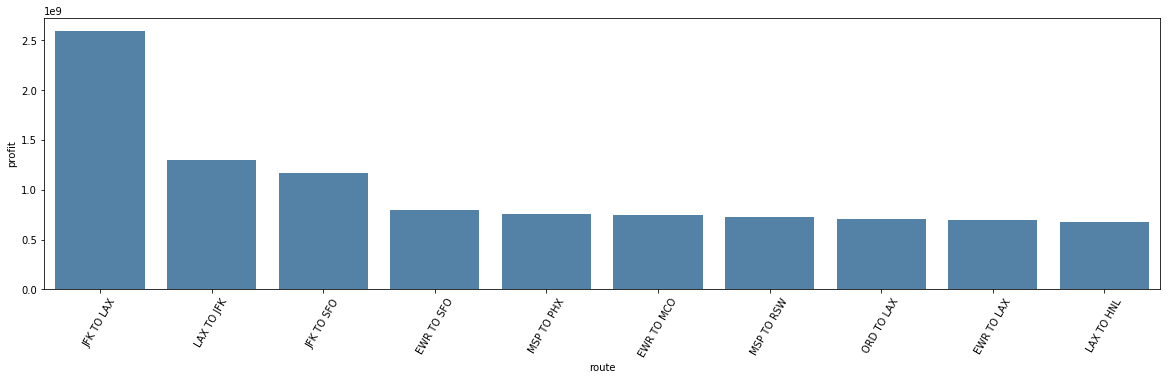

In [279]:
data['profit']=data['income']-data['cost']
temp=data.sort_values(by='profit',ascending=False)[:10]
ax=sns.barplot(x=temp['route'],y=temp['profit'], color='steelblue')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)

In [280]:
##data.head(3)
#data2=data.drop(['route', 'cost', 'income', 'profit','busy_route', 'profit_per_trip', 'DISTANCE','PASSENGERS', 'total_count', 'ITIN_FARE', 'busy_route', 'delay'], axis=1)
#data2 = data[['route', 'cost', 'income', 'profit', 'DISTANCE','PASSENGERS', 'OCCUPANCY_RATE', 'total_count', 'ITIN_FARE']].copy()

In [281]:
Most_profitable=data.sort_values(by='profit',ascending=False)[:10]

In [282]:
Most_profitable.reset_index(drop=True, inplace=True)

In [283]:
Most_profitable

route  PASSENGERS  ITIN_FARE  DEP_DELAY  ARR_DELAY   DISTANCE  \
0  JFK TO LAX     3362.00  790838.00   11159.00   16023.00 3940200.00   
1  LAX TO JFK     2134.00  639407.00   20790.00   16792.00 4019400.00   
2  JFK TO SFO     1662.00  727037.00   13382.00   16739.00 2764434.00   
3  EWR TO SFO     1307.00  629640.00   10833.00   12376.00 1577475.00   
4  MSP TO PHX     2726.00  284020.00    4783.00    5665.00  820468.00   
5  EWR TO MCO     3275.00  235879.00   12352.00   13252.00  802072.00   
6  MSP TO RSW     2653.00  275940.00    2767.00    2941.00  420552.00   
7  ORD TO LAX     2288.00  320804.00   10936.00   11115.00 1663776.00   
8  EWR TO LAX     1672.00  429158.00    6359.00    8319.00 1337430.00   
9  LAX TO HNL     1808.00  389152.00    8248.00   11176.00 1927224.00   

   OCCUPANCY_RATE  total_count      TYPE_left     TYPE_right    total_fare  \
0       207162.00         1592  large_airport  large_airport 2658797356.00   
1       213796.00         1624  large_airport  large_airport 1364494538.00   
2       141260.00         1069  large_airport  large_airport 1208335494.00   
3        80378.00          615  large_airport  large_airport  822939480.00   
4        82144.00          643  large_airport  large_airport  774238520.00   
5       113004.00          856  large_airport  large_airport  772503725.00   
6        39174.00          297  large_airport  large_airport  732068820.00   
7       124804.00          954  large_airport  large_airport  733999552.00   
8        72010.00          545  large_airport  large_airport  717552176.00   
9        99068.00          754  large_airport  large_airport  703586816.00   

   baggage_cost  arr_delay_cost  dep_delay_cost  airport_cost  \
0    7250670.00      1201725.00       836925.00      31840000   
1    7482860.00      1259400.00      1559250.00      32480000   
2    4944100.00      1255425.00      1003650.00      21380000   
3    2813230.00       928200.00       812475.00      12300000   
4    2875040.00       424875.00       358725.00      12860000   
5    3955140.00       993900.00       926400.00      17120000   
6    1371090.00       220575.00       207525.00       5940000   
7    4368140.00       833625.00       820200.00      19080000   
8    2520350.00       623925.00       476925.00      10900000   
9    3467380.00       838200.00       618600.00      15080000   

   essentials_cost        income        cost        profit  
0      36171036.00 2666048026.00 70049686.00 2595998340.00  
1      36898092.00 1371977398.00 72196742.00 1299780656.00  
2      25377504.12 1213279594.00 49016579.12 1164263014.88  
3      14481220.50  825752710.00 28521895.50  797230814.50  
4       7531896.24  777113560.00 21175496.24  755938063.76  
5       7363020.96  776458865.00 26403320.96  750055544.04  
6       3860667.36  733439910.00 10228767.36  723211142.64  
7      15273463.68  738367692.00 36007288.68  702360403.32  
8      12277607.40  720072526.00 24278457.40  695794068.60  
9      17691916.32  707054196.00 34228716.32  672825479.68

In [284]:
Most_profitable.to_csv("profit.csv")

## Question 3)
The 5 round trip routes that you recommend to invest in based on any factors that you choose.

My Choices will be;
1)JFK TO LAX
2)LAX TO JFK
3)JFK TO SFO
4)EWR TO MCO
5)MSP TO PHX
The factor I based my selection on is on routes that a highest numbers in the mixture of  i) profit, ii) busiest route, No of passengers

## Question 4) 
The number of round trip flights it will take to breakeven on the upfront airplane cost for each of the 5 round trip routes that you recommend. Print key summary components for these routes

1)JFK TO LAX

2)LAX TO JFK

3)JFK TO SFO

4)EWR TO MCO

5)MSP TO PHX

key summary components for these routes provided in the PDF Document

## Question 5) 
Key Performance Indicators (KPI’s) that you recommend tracking in the future to measure the success of the round trip routes that you recommend.

The Key Performance Indicators (KPI’s) that I will recommend tracking in the future to measure the success of the round trip routes will be:

i) Profits: An increase in profits is one of the key performance indicators used to measure the success of round trips.

ii) Occupancy Rate: Increases in the percentage of occupied seats is a high-level indicator of success.

iii) Cancelled Flights: Decreases in cancelled flights increases profits by boosting customer confidence, which may expand the customer base.

iv) Count of Round Trips: An increase in the number of rounds trips can be an indicator of success due to the revenue received for each passenger for each flight.

